<a href="https://colab.research.google.com/github/jiangyuinsar/okada_wrapper/blob/master/Quick_Okada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Yu Jiang](https://www.twitter.com/jiangyuinsar)

In [34]:
# install okada_wrapper (https://github.com/tbenthompson/okada_wrapper) from PyPI
!pip install okada_wrapper

In [35]:
from okada_wrapper import dc3d0wrapper, dc3dwrapper
import numpy as np
import matplotlib.pyplot as plt
# Yu Jiang
# University of Liverpool
# Dec 8, 2021

##################
# 1 input
##################
# (1) observation points
roi_x = 100000 # length of roi (unit: meter)
roi_y = 100000 # width of roi (unit: meter)
dxy = 100 # resolution of roi (unit: meter)
n = (int(roi_x/dxy), int(roi_y/dxy))
x_1d = np.linspace(-roi_x/2, roi_x/2, n[0])
y_1d = np.linspace(-roi_y/2, roi_y/2, n[1])
x_2d = np.zeros((n[0]*n[1],1))
y_2d = np.zeros((n[0]*n[1],1))

# (2) satellite parameters
wavelength_sentinel = 0.056 # wavelength (unit: meter)
wavelength_alos = 0.236 # wavelength (unit: meter)

Inc_asc = 36 # incidence angle (unit: degree)
Heading_asc = -11 # heading angle (unit: degree)

Inc_dsc = 41 # incidence angle (unit: degree)
Heading_dsc = -169 # heading angle (unit: degree)

UEast_asc = -np.cos(Heading_asc*np.pi/180)*np.sin(Inc_asc*np.pi/180)
UNorth_asc = np.sin(Heading_asc*np.pi/180)*np.sin(Inc_asc*np.pi/180)
UVert_asc = np.cos(Inc_asc*np.pi/180)

UEast_dsc = -np.cos(Heading_dsc*np.pi/180)*np.sin(Inc_dsc*np.pi/180)
UNorth_dsc = np.sin(Heading_dsc*np.pi/180)*np.sin(Inc_dsc*np.pi/180)
UVert_dsc = np.cos(Inc_dsc*np.pi/180)

# (3) fault parameters 
fault_length = 20000 # fault length (unit: meter)
fault_width = 7000 # fault width (unit: meter)
fault_mid_depth = 3500 # middle depth (unit: meter)
fault_strike = 317 # fault strike angle (unit: degree)
fault_dip = 76 # fault dip angle (unit: degree)
fault_strike_slip = 0 # fault strike slip (unit: meter)
fault_dip_slip = 1.8 # fault dip angle (unit: meter)

nu = 0.25
mu = 1.0
lmda = 2 * mu * nu / (1 - 2 * nu)
alpha = (lmda + mu) / (lmda + 2 * mu)

##################
# 2 calculation
##################
ux_2d = np.zeros((n[0]*n[1],1))
uy_2d = np.zeros((n[0]*n[1],1))
uz_2d = np.zeros((n[0]*n[1],1))
k = 0
for i in range(n[0]):
    for j in range(n[1]):
        success, u, grad_u = dc3dwrapper(alpha,[x_1d[i], y_1d[j], 0], fault_mid_depth, fault_dip,[-fault_length/2,fault_length/2], [-fault_width/2,fault_width/2],[fault_strike_slip, fault_dip_slip, 0.0])
        x_2d[k] = x_1d[i]
        y_2d[k] = y_1d[j]
        ux_2d[k] = -u[1]
        uy_2d[k] = u[0]
        uz_2d[k] = u[2]
        k = k+1

ULos_asc = UEast_asc*ux_2d + UNorth_asc*uy_2d + UVert_asc*uz_2d # surface deformation in satellite line-of-sight direction
ULos_asc_sentinel = -ULos_asc*(4*np.pi)/wavelength_sentinel # convert unit from meter to radian
ULos_asc_alos = -ULos_asc*(4*np.pi)/wavelength_alos # convert unit from meter to radian

ULos_dsc = UEast_dsc*ux_2d + UNorth_dsc*uy_2d + UVert_dsc*uz_2d # surface deformation in satellite line-of-sight direction
ULos_dsc_sentinel = -ULos_dsc*(4*np.pi)/wavelength_sentinel # convert unit from meter to radian
ULos_dsc_alos = -ULos_dsc*(4*np.pi)/wavelength_alos # convert unit from meter to radian

rx = np.cos((-fault_strike+90)*np.pi/180)*x_2d - np.sin((-fault_strike+90)*np.pi/180)*y_2d
ry = np.sin((-fault_strike+90)*np.pi/180)*x_2d + np.cos((-fault_strike+90)*np.pi/180)*y_2d

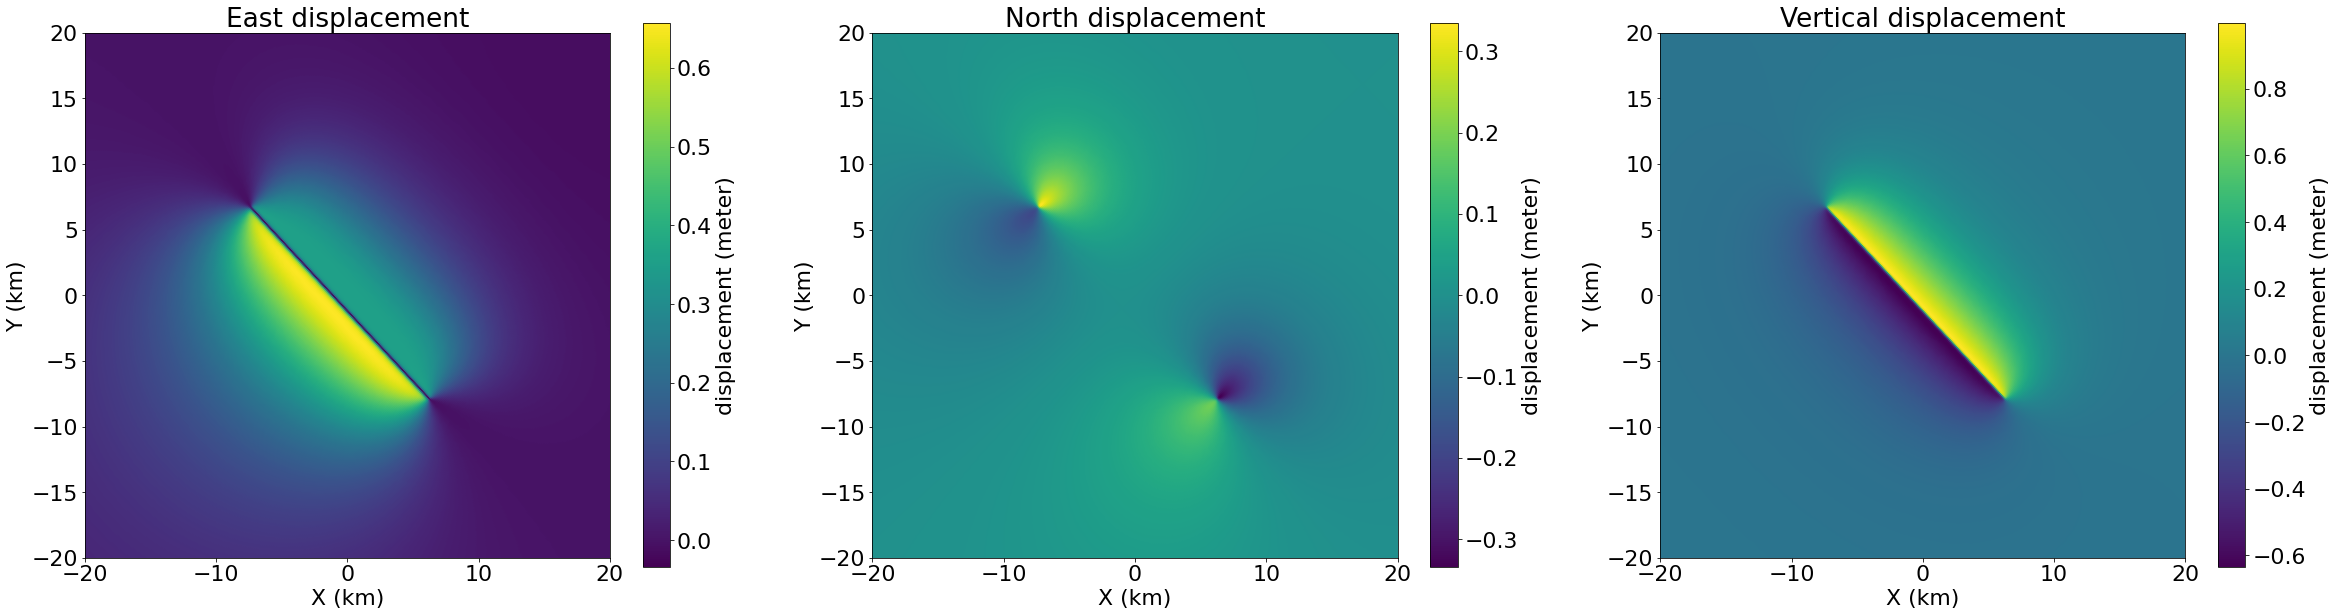

In [36]:
##################
# 3 plot surface deformation: East/North/Vertical direction
##################
# East
plt.figure(figsize=(40, 10))
plt.subplot(1, 3, 1)
plt.axis('equal')
plt.scatter(rx/1000, ry/1000, s=5, marker='o', c= ux_2d)
cbar = plt.colorbar()
cbar.ax.set_ylabel('displacement (meter)', rotation=90)
plt.rcParams.update({'font.size': 22})
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('East displacement')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal', adjustable='box')

# North
plt.subplot(1, 3, 2)
plt.axis('equal')
plt.scatter(rx/1000, ry/1000, s=5, marker='o', c= uy_2d)
cbar = plt.colorbar()
cbar.ax.set_ylabel('displacement (meter)', rotation=90)
plt.rcParams.update({'font.size': 22})
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('North displacement')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal', adjustable='box')

# Vertical
plt.subplot(1, 3, 3)
plt.axis('equal')
plt.scatter(rx/1000, ry/1000, s=5, marker='o', c= uz_2d)
cbar = plt.colorbar()
cbar.ax.set_ylabel('displacement (meter)', rotation=90)
plt.rcParams.update({'font.size': 22})
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Vertical displacement')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

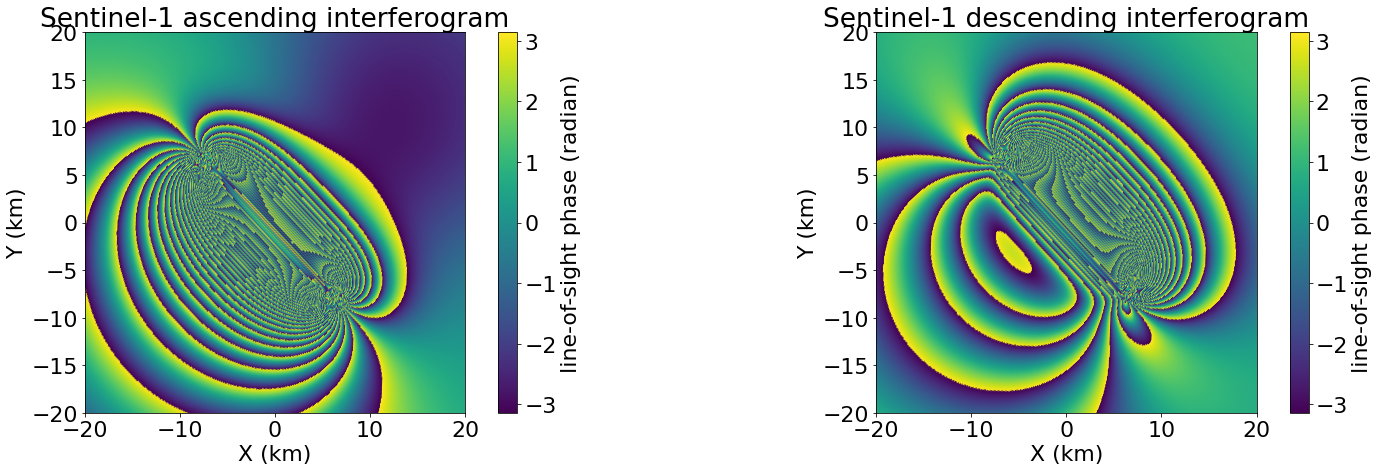

In [38]:
##################
# 3 plot surface deformation: Sentinel-1 line-of-sight direction
##################
plt.figure(figsize=(26, 7))
plt.subplot(1, 2, 1)
plt.axis('equal')
plt.scatter(rx/1000, ry/1000, s=5, marker='o', c= ((ULos_asc_sentinel+np.pi)%(2*np.pi)-np.pi))
cbar = plt.colorbar()
cbar.ax.set_ylabel('line-of-sight phase (radian)', rotation=90)
plt.rcParams.update({'font.size': 22})
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Sentinel-1 ascending interferogram')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1, 2, 2)
plt.axis('equal')
plt.scatter(rx/1000, ry/1000, s=5, marker='o', c= ((ULos_dsc_sentinel+np.pi)%(2*np.pi)-np.pi))
cbar = plt.colorbar()
cbar.ax.set_ylabel('line-of-sight phase (radian)', rotation=90)
plt.rcParams.update({'font.size': 22})
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Sentinel-1 descending interferogram')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

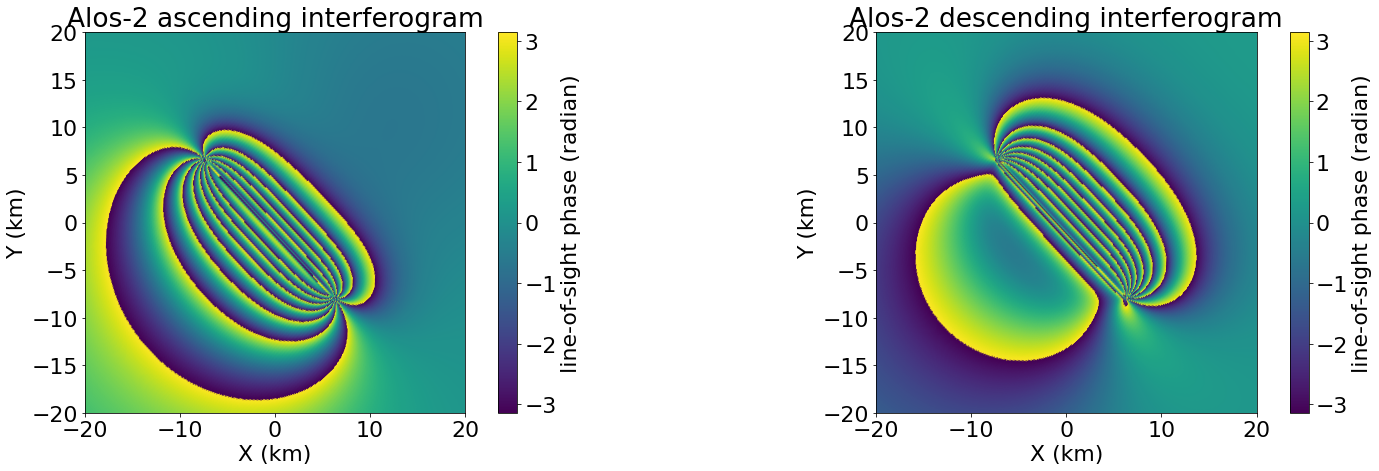

In [39]:
##################
# 3 plot surface deformation: Alos-2 line-of-sight direction
##################
plt.figure(figsize=(26, 7))
plt.subplot(1, 2, 1)
plt.axis('equal')
plt.scatter(rx/1000, ry/1000, s=5, marker='o', c= ((ULos_asc_alos+np.pi)%(2*np.pi)-np.pi))
cbar = plt.colorbar()
cbar.ax.set_ylabel('line-of-sight phase (radian)', rotation=90)
plt.rcParams.update({'font.size': 22})
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Alos-2 ascending interferogram')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1, 2, 2)
plt.axis('equal')
plt.scatter(rx/1000, ry/1000, s=5, marker='o', c= ((ULos_dsc_alos+np.pi)%(2*np.pi)-np.pi))
cbar = plt.colorbar()
cbar.ax.set_ylabel('line-of-sight phase (radian)', rotation=90)
plt.rcParams.update({'font.size': 22})
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Alos-2 descending interferogram')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()